In [1]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl



%env ROS_IP=192.168.0.17
%env ROS_MASTER_URI=http://192.168.0.17:11311

!echo $ROS_IP
!echo $ROS_MASTER_URI

env: ROS_IP=192.168.0.17
env: ROS_MASTER_URI=http://192.168.0.17:11311
192.168.0.17
http://192.168.0.17:11311


In [2]:
cam = LocobotCamera()

In [3]:
arm_control = LocobotArmControl(gripper_joint_names=["left_finger"])
# cam = LocobotCamera()
# arm_control.move_arm([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])




[INFO] [1745879125.638431]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745879125.804165]: Joint‐space action server ready
[ INFO] [1745879125.874433785]: Loading robot model 'locobot'...
[ INFO] [1745879125.876431480]: No root/virtual joint specified in SRDF. Assuming fixed joint
[ INFO] [1745879128.817982027]: Ready to take commands for planning group interbotix_arm.


[ WARN] [1745879125.869807639]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871245133]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871324558]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871343911]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871361163]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871374163]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871391772]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871404952]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1745879125.871421378]: Link 'locobot/ca

[INFO] [1745879129.837324]: LocobotArmControl initialized


In [ ]:
arm_control.move_gripper(0.0)

503.0299987792969
object detected
527.239990234375
548.760009765625
570.280029296875
597.1799926757812
618.7000122070312
645.6000366210938
677.8800048828125
696.7100219726562
720.9200439453125
734.3699951171875
750.510009765625
761.27001953125
777.4100341796875
790.8600463867188
801.6199951171875
815.0700073242188
828.52001953125
836.5900268554688
847.3500366210938
855.4200439453125


[ERROR] [1745879205.033406]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879205.041678]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

860.800048828125


[ERROR] [1745879205.239279]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]



868.8699951171875
874.25
879.6300048828125
882.3200073242188
887.7000122070312
890.3900146484375
893.0800170898438
895.77001953125
895.77001953125
898.4600219726562
901.1500244140625
901.1500244140625
903.8400268554688
903.8400268554688
906.530029296875
906.530029296875
906.530029296875
906.530029296875
909.2200317382812
909.2200317382812


[ERROR] [1745879205.249385]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879205.259152]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

909.2200317382812


[ERROR] [1745879205.453563]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]



909.2200317382812
909.2200317382812
909.2200317382812
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879205.461194]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879205.469725]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879205.672592]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879205.679327]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879205.881699]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879205.889450]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879206.091595]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879206.101899]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879206.302924]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879206.309272]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879206.510474]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879206.519253]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879206.719250]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879206.732184]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879206.932624]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879206.939170]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879207.139543]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879207.149425]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879207.351315]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879207.359265]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879207.561330]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879207.569210]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879207.770440]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879207.779172]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879207.981893]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879207.989170]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879208.189153]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879208.202835]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879208.401790]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879208.409090]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879208.611296]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879208.619111]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879208.819535]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879208.829076]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879209.029163]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879209.040147]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879209.245315]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879209.249388]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879209.449358]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879209.461602]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879209.661124]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879209.670427]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879209.871761]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879209.881159]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
906.530029296875
906.530029296875
903.8400268554688
906.530029296875
906.530029296875
906.530029296875
909.2200317382812
909.2200317382812
909.2200317382812
909.2200317382812
909.2200317382812
909.2200317382812
911.9100341796875


[ERROR] [1745879210.076108]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879210.080361]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879210.289703]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879210.302731]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879210.503715]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879210.509580]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879210.710766]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879210.719028]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879210.927145]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879210.939205]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879211.139508]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879211.148936]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879211.349956]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879211.359114]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879211.780569]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879211.789019]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879211.990109]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879212.009019]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879212.207585]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879212.215440]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879212.438812]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879212.482862]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879212.648620]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879212.651892]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879212.858992]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879212.880321]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879213.074521]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879213.077412]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879213.282568]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879213.288934]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879213.490851]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879213.496179]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879213.711153]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879213.717654]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879213.934582]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879213.940310]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879214.152368]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879214.157541]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879214.358665]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879214.372302]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879214.570952]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879214.579047]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879214.775795]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879214.779198]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879214.980326]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879214.988694]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879215.188680]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879215.199829]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879215.399009]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879215.410558]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879215.614037]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879215.631946]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879215.828530]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879215.841733]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879216.042007]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879216.048609]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879216.248696]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879216.258703]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879216.458588]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879216.468958]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879216.673383]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879216.678993]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879216.882843]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879216.888714]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879217.088610]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879217.098544]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879217.298544]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879217.310914]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879217.511131]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879217.524625]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879217.721700]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879217.731512]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879217.942769]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879217.960008]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879218.152580]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879218.158376]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879218.364266]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879218.399433]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879218.583780]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879218.595881]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879218.804807]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879218.827990]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879219.019804]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879219.027583]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879219.228391]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879219.238363]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879219.438033]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879219.446580]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879219.659142]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879219.662386]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879219.869206]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879219.881020]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879220.077674]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879220.088731]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879220.288937]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879220.300382]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879220.497778]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879220.507260]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879220.713626]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879220.751582]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879220.942205]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879220.994040]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879221.180120]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879221.202295]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879221.399518]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879221.425699]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879221.611728]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879221.624321]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879221.815794]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879221.834260]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879222.043652]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879222.074852]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879222.292027]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879222.337109]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879222.510094]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879222.538804]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879222.754142]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879222.774465]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879222.963540]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879222.970059]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879223.172222]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879223.183689]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879223.379068]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879223.389087]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879223.611770]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879223.616853]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879223.846516]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879223.860327]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879224.064820]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879224.112213]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879224.295936]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879224.303704]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879224.545107]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879224.556782]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879224.751451]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879224.759860]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879224.961539]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879224.970138]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879225.174852]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879225.184695]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879225.392704]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879225.436425]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879225.601573]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879225.610546]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879225.809276]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879225.834987]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879226.022014]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879226.029873]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879226.240794]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879226.252340]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879226.449539]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879226.463062]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879226.678814]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879226.715985]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879226.899275]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879226.901888]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879227.107287]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879227.124285]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879227.321477]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879227.337895]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879227.544271]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879227.547724]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879227.751217]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879227.764094]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879227.958811]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879227.968811]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879228.172057]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879228.181008]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879228.383532]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879228.393964]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879228.589698]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879228.600086]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879228.811985]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879228.820142]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879229.016110]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879229.020070]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879229.221132]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879229.223770]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879229.523562]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879229.539159]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879229.740022]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879229.765287]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879229.952918]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879229.959268]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879230.172278]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879230.187072]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879230.380761]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879230.401778]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879230.592617]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879230.610488]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879230.802807]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879230.812276]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879231.012043]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879231.059731]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879231.216404]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879231.231594]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879231.419878]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879231.432866]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879231.658499]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879231.660994]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879231.890674]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879231.907596]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879232.104042]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879232.109180]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879232.315846]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879232.335441]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879232.518420]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879232.525811]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879232.731960]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879232.740339]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879232.941162]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879232.955750]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879233.148550]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879233.161105]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879233.359685]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879233.374559]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879233.594094]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879233.599586]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879233.832011]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879233.884536]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879234.051166]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879234.061721]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879234.264496]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]

[ERROR] [1745879234.311998]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control

911.9100341796875
911.9100341796875
911.9100341796875


[ERROR] [1745879234.466473]: bad callback: <bound method LocobotArmControl._joint_states_cb of <visioncraft.locobot.arm_control.LocobotArmControl object at 0x7fd9649fcdc0>>
Traceback (most recent call last):
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 750, in _invoke_callback
    cb(msg)
  File "/home/locobot/Workspace/crafter/visioncraft/locobot/arm_control.py", line 250, in _joint_states_cb
    self.gripper_pub.publish(release)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/topics.py", line 879, in publish
    data = args_kwds_to_message(self.data_class, args, kwds)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/msg.py", line 121, in args_kwds_to_message
    raise TypeError("expected [%s] but got [%s]"%(data_class._slot_types[0], arg._type))
TypeError: expected [string] but got [trajectory_msgs/JointTrajectory]



In [6]:
arm_control.move_gripper(1)

[WARN] [1745879147.008663]: ❌ No object detected before fully closed


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler

# Create target poses
target_pose = Pose()
target_pose.position.x = 0.3
target_pose.position.y = -0.3
target_pose.position.z = 0.2

# Create a quaternion for (roll=0, pitch=-90°, yaw=0)
q = quaternion_from_euler(0, np.pi/2, 0)
target_pose.orientation.x = q[0]
target_pose.orientation.y = q[1]
target_pose.orientation.z = q[2]
target_pose.orientation.w = q[3]


# Execute the grab sequence
# arm_control.move_gripper(0.1)  # Open gripper
arm_control.go_to_pose(target_pose)  # Move to approach position


True

In [4]:
arm_control.move_gripper(1.0)

header: 
  seq: 200073
  stamp: 
    secs: 1745859426
    nsecs: 208255767
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - left_finger
  - right_finger
  - pan
  - tilt
position: [0.0, 0.0, -0.9602720141410828, 0.36968937516212463, 0.04448544234037399, -0.003067961661145091, 1.2072429656982422, -0.9664078950881958, 0.016873789951205254, 0.019731242209672928, -0.019731242209672928, -0.013805827125906944, 0.17794176936149597]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
effort: [0.0, 0.0, -88.77000427246094, -349.70001220703125, -312.0400085449219, 5.380000114440918, 0.0, 0.0, -169.47000122070312, 0.0, 0.0, 0.0, 0.0]
0.0
header: 
  seq: 200076
  stamp: 
    secs: 1745859426
    nsecs: 238274812
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  

In [6]:
arm_control.move_gripper(0.5)

header: 
  seq: 204993
  stamp: 
    secs: 1745859475
    nsecs: 408286571
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - left_finger
  - right_finger
  - pan
  - tilt
position: [0.0, 0.0, -0.9602720141410828, 0.36968937516212463, 0.04448544234037399, -0.003067961661145091, 1.2072429656982422, -0.9664078950881958, 0.015339808538556099, 0.019709520041942596, -0.019709520041942596, -0.013805827125906944, 0.17794176936149597]
velocity: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
effort: [0.0, 0.0, -86.08000183105469, -349.70001220703125, -312.0400085449219, 0.0, 0.0, 0.0, -153.3300018310547, 0.0, 0.0, 0.0, 0.0]
0.0
header: 
  seq: 204996
  stamp: 
    secs: 1745859475
    nsecs: 438275337
  frame_id: ''
name: 
  - left_wheel_joint
  - right_wheel_joint
  - waist
  - shoulder
  - elbow
  - forearm_roll
  - wrist_angle
  - wrist_rotate
  - gripper
  - l

In [12]:
cam = LocobotCamera()

In [ ]:
image = cam.get_image()
# print(image)

In [9]:
cam.tilt(1)

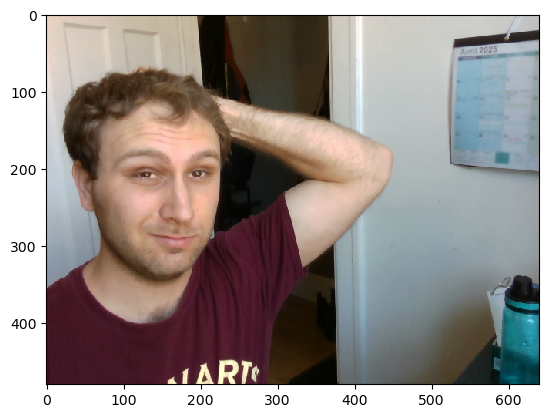

In [18]:

import matplotlib.pyplot as plt

image = cam.get_image()
# convert bgr to rgb
image = image[:, :, ::-1]
plt.imshow(image)
plt.show()